In [10]:
import pandas as pd
import numpy as np

# Generating mock data
np.random.seed(42)

data = pd.DataFrame({
    'sensor_1': np.random.normal(0, 1, 1000),
    'sensor_2': np.random.normal(0, 1, 1000),
    'sensor_3': np.random.normal(0, 1, 1000),
    'operational_hours': np.random.randint(100, 5000, 1000),
    'maintenance': np.random.choice([0, 1], 1000, p=[0.95, 0.05])
})

# Simulating remaining useful life (RUL) based on operational hours and sensor readings
data['RUL'] = 5000 - data['operational_hours'] - (data['sensor_1'] + data['sensor_2'] + data['sensor_3']).cumsum()

# Save to CSV
data.to_csv(r'C:\Users\aradhya\OneDrive\Documents\Predictive\machinery_data.csv', index=False)


In [11]:
data.head()

,sensor_1,sensor_2,sensor_3,operational_hours,maintenance,RUL
0,0.496714,1.399355,-0.675178,831,0,4167.779109
1,-0.138264,0.924634,-0.144519,4061,0,937.137258
2,0.647689,0.059630,-0.792420,4801,0,197.222359
3,1.523030,-0.646937,-0.307962,2604,0,2393.654227
4,-0.234153,0.698223,-1.893615,714,0,4285.083772


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sensor_1           1000 non-null   float64
 1   sensor_2           1000 non-null   float64
 2   sensor_3           1000 non-null   float64
 3   operational_hours  1000 non-null   int32  
 4   maintenance        1000 non-null   int32  
 5   RUL                1000 non-null   float64
dtypes: float64(4), int32(2)
memory usage: 39.2 KB


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv(r'C:\Users\aradhya\OneDrive\Documents\Predictive\machinery_data.csv')

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

# Feature selection
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'

# Normalize features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Split data for regression and classification
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(data[features], data[target_rul], test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(data[features], data[target_maintenance], test_size=0.2, random_state=42)


C:\Users\aradhya\AppData\Local\Temp\ipykernel_4768\3772980853.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train regression model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Model MSE: {mse_reg}")


Regression Model MSE: 1103.2844396957576


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train classification model
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate
y_pred_clf = clf_model.predict(X_test_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Model Accuracy: {accuracy_clf}")
print(classification_report(y_test_clf, y_pred_clf))



Classification Model Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200



C:\Users\aradhya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aradhya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aradhya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Step 1: Generate synthetic data
np.random.seed(42)

df = pd.DataFrame({
    'machineID': np.arange(1, 1001),
    'datetime': pd.date_range(start='2023-01-01', periods=1000, freq='H'),
    'sensor_1': np.random.normal(0, 1, 1000),
    'sensor_2': np.random.normal(0, 1, 1000),
    'sensor_3': np.random.normal(0, 1, 1000),
    'volt': np.random.normal(220, 5, 1000),
    'rotate': np.random.normal(1500, 100, 1000),
    'pressure': np.random.normal(30, 3, 1000),
    'vibration': np.random.normal(0.5, 0.1, 1000),
    'operational_hours': np.random.randint(100, 5000, 1000)
})

# Step 2: Create binary target variable (label)
df['maint_comp1'] = (
    (df['operational_hours'] > 4000) |
    (df['sensor_1'] > 2) |
    (df['sensor_2'] > 2) |
    (df['vibration'] > 0.8)
).astype(int)

# Step 3: Extract features and target
X = df.drop(['machineID', 'datetime', 'maint_comp1'], axis=1).values
y = df['maint_comp1'].values

# Step 4: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

# Step 6: Define the DNN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 7: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=72, validation_data=(X_test, y_test), verbose=2)

# Step 9: Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


C:\Users\aradhya\AppData\Local\Temp\ipykernel_4768\1409719769.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'datetime': pd.date_range(start='2023-01-01', periods=1000, freq='H'),
C:\Users\aradhya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12/12 - 4s - 335ms/step - accuracy: 0.6587 - loss: 0.6432 - val_accuracy: 0.8000 - val_loss: 0.5211
Epoch 2/10
12/12 - 0s - 11ms/step - accuracy: 0.7675 - loss: 0.5093 - val_accuracy: 0.8000 - val_loss: 0.4327
Epoch 3/10
12/12 - 0s - 10ms/step - accuracy: 0.7763 - loss: 0.4414 - val_accuracy: 0.8500 - val_loss: 0.3728
Epoch 4/10
12/12 - 0s - 11ms/step - accuracy: 0.8313 - loss: 0.3836 - val_accuracy: 0.8450 - val_loss: 0.3326
Epoch 5/10
12/12 - 0s - 11ms/step - accuracy: 0.8675 - loss: 0.3597 - val_accuracy: 0.8550 - val_loss: 0.3138
Epoch 6/10
12/12 - 0s - 11ms/step - accuracy: 0.8700 - loss: 0.3220 - val_accuracy: 0.8450 - val_loss: 0.3041
Epoch 7/10
12/12 - 0s - 11ms/step - accuracy: 0.8637 - loss: 0.3192 - val_accuracy: 0.8400 - val_loss: 0.2904
Epoch 8/10
12/12 - 0s - 11ms/step - accuracy: 0.8750 - loss: 0.2972 - val_accuracy: 0.8650 - val_loss: 0.2777
Epoch 9/10
12/12 - 0s - 11ms/step - accuracy: 0.8700 - loss: 0.2935 - val_accuracy: 0.8850 - val_loss: 0.2725
Epoch 10/

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic data
np.random.seed(42)

df = pd.DataFrame({
    'machineID': np.arange(1, 1001),
    'datetime': pd.date_range(start='2023-01-01', periods=1000, freq='H'),
    'sensor_1': np.random.normal(0, 1, 1000),
    'sensor_2': np.random.normal(0, 1, 1000),
    'sensor_3': np.random.normal(0, 1, 1000),
    'volt': np.random.normal(220, 5, 1000),
    'rotate': np.random.normal(1500, 100, 1000),
    'pressure': np.random.normal(30, 3, 1000),
    'vibration': np.random.normal(0.5, 0.1, 1000),
    'operational_hours': np.random.randint(100, 5000, 1000)
})

# Step 2: Create binary label for maintenance need
df['maint_comp1'] = (
    (df['operational_hours'] > 4000) |
    (df['sensor_1'] > 2) |
    (df['sensor_2'] > 2) |
    (df['vibration'] > 0.8)
).astype(int)

# Step 3: Prepare features and target
X = df.drop(['machineID', 'datetime', 'maint_comp1'], axis=1).values
y = df['maint_comp1'].values

# Step 4: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

# === 1. Decision Tree Classifier ===
print("=== Decision Tree Classifier ===")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# === 2. Random Forest Classifier ===
print("\n=== Random Forest Classifier ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# === 3. AdaBoost Classifier ===
print("\n=== AdaBoost Classifier ===")
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ab))


C:\Users\aradhya\AppData\Local\Temp\ipykernel_4768\3909271470.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'datetime': pd.date_range(start='2023-01-01', periods=1000, freq='H'),


=== Decision Tree Classifier ===
Decision Tree Accuracy: 1.0

=== Random Forest Classifier ===
Random Forest Accuracy: 1.0

=== AdaBoost Classifier ===
AdaBoost Accuracy: 1.0


C:\Users\aradhya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


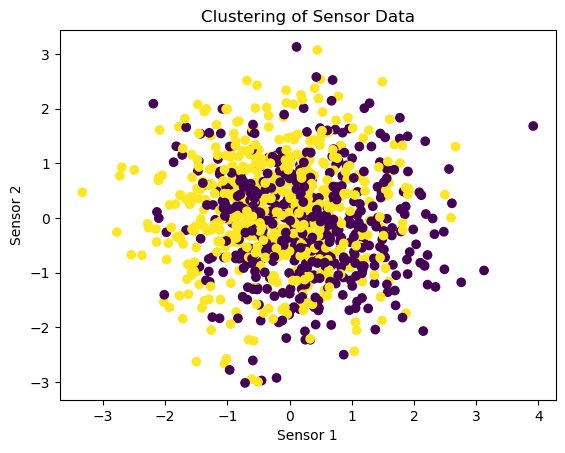

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Train clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])

# Visualize clustering results
plt.scatter(data['sensor_1'], data['sensor_2'], c=data['cluster'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Clustering of Sensor Data')
plt.show()


In [19]:
def predict_maintenance(features):
    # Predict RUL
    rul_pred = reg_model.predict([features])
    
    # Predict maintenance status
    maint_pred = clf_model.predict([features])
    
    # Predict cluster (anomaly detection)
    cluster_pred = kmeans.predict([features])
    
    return {
        'RUL Prediction': rul_pred[0],
        'Maintenance Prediction': 'Needs Maintenance' if maint_pred[0] == 1 else 'Normal',
        'Anomaly Detection': 'Anomaly' if cluster_pred[0] == 1 else 'Normal'
    }

# Example prediction
sample_features = [0.1, 0.2, 0.3, 1000]
prediction = predict_maintenance(sample_features)
print(prediction)


{'RUL Prediction': -2.678206262696707, 'Maintenance Prediction': 'Normal', 'Anomaly Detection': 'Normal'}


C:\Users\aradhya\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\aradhya\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\aradhya\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Generate synthetic data
np.random.seed(42)
num_samples = 1000

df = pd.DataFrame({
    'machineID': np.random.randint(1, 21, size=num_samples),
    'datetime': pd.date_range(start='2023-01-01', periods=num_samples, freq='H'),
    'sensor_1': np.random.normal(0, 1, num_samples),
    'sensor_2': np.random.normal(0, 1, num_samples),
    'sensor_3': np.random.normal(0, 1, num_samples),
    'volt': np.random.normal(220, 5, num_samples),
    'rotate': np.random.normal(1500, 100, num_samples),
    'pressure': np.random.normal(30, 3, num_samples),
    'vibration': np.random.normal(0.5, 0.1, num_samples),
    'operational_hours': np.random.randint(100, 5000, num_samples)
})

# Step 2: Convert datetime to proper format
df['datetime'] = pd.to_datetime(df['datetime'])

# Step 3: Simulate RUL (Remaining Useful Life) per machine
df['max_date'] = df.groupby('machineID')['datetime'].transform('max')
df['RUL'] = (df['max_date'] - df['datetime']).dt.total_seconds() // 3600  # Convert to hours
df.drop(columns='max_date', inplace=True)

# Step 4: Prepare features and target
drop_cols = ['machineID', 'datetime', 'RUL']
X = df.drop(columns=drop_cols)
y = df['RUL']

# Step 5: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 7: Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Step 8: Predictions and Evaluation
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 9: Display metrics
print("Model Evaluation Metrics:")
print(f"→ Mean Squared Error (MSE): {mse:.2f}")
print(f"→ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"→ Mean Absolute Error (MAE): {mae:.2f}")
print(f"→ R² Score: {r2:.2f}")


C:\Users\aradhya\AppData\Local\Temp\ipykernel_4768\959987180.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'datetime': pd.date_range(start='2023-01-01', periods=num_samples, freq='H'),


Model Evaluation Metrics:
→ Mean Squared Error (MSE): 87963.65
→ Root Mean Squared Error (RMSE): 296.59
→ Mean Absolute Error (MAE): 257.48
→ R² Score: -0.08
